In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv('atherosclerosis.csv')

In [3]:
data.head()

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1
3,109.572882,1,D1
4,114.993803,1,D1


In [4]:
data.groupby(['age','dose']).agg({'count', 'mean', np.std})
# возраст, дозировка, экспрессия
# получаем 4 группы испытуемых

expr                
                mean count       std
age dose                            
1   D1    104.758464    16  5.863454
    D2    105.545864    16  4.369024
2   D1    101.004805    16  5.116310
    D2    102.273629    16  5.135374

In [5]:
model = ols('expr ~ C(dose)*C(age)', data).fit()
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(dose),16.912241,1.0,0.638094,0.427552
C(age),197.452754,1.0,7.449841,0.008313
C(dose):C(age),0.927077,1.0,0.034978,0.852272
Residual,1590.257424,60.0,NaN,NaN


Больший вклад вносит возраст, его сумма квадратов большая, а p-значение < 0.05

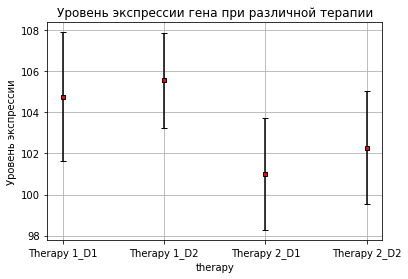

In [6]:
# ДИ
#выставляем уровень значимости
p = 0.95

data_agg = data.groupby(['age','dose']).agg(['count','mean','std'])
#для каждой выборки высчитываем интервал по формуле для t-распределения: (K * se), где 
#K t-value, зависит от степеней свободы df = n-1 и целевого значения вероятности p, 
#se - стандартная ошибка среднего = std/sqrt(n), std - стандартное отклонение выборки, n - количество элементов 
data_agg['interval'] = stats.t.ppf((1 + p)/2, data_agg['expr']['count']-1)*data_agg['expr']['std']/(data_agg['expr']['count'] ** 0.5)

#cтроим доверительные интервалы на графике
plt.errorbar(x=['Therapy ' + str(i[0]) + '_' + i[1] for i in data_agg.index], y=data_agg['expr']['mean'], yerr=data_agg['interval'], color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')
plt.title('Уровень экспрессии гена при различной терапии')
plt.grid()
plt.xlabel('therapy')
plt.ylabel('Уровень экспрессии')
plt.show()

Вне зависимости от дозировки возраст 1 оказался значимо отличным от возраста 2  
Разные дозировки не отличаются друг от друга

# Пример 2

In [7]:
data2 = pd.read_csv('birds.csv')
data2.head()

,var4,hormone,sex
0,17.859039,1,1
1,20.842343,1,1
2,19.318099,1,1
3,20.064451,1,1
4,17.620316,1,1


In [8]:
data2.groupby(['hormone','sex']).agg({'count', 'mean', np.std})

var4                
                  mean count       std
hormone sex                           
0       0    19.887291    16  3.677211
        1    17.608916    16  2.449753
1       0    17.292254    16  2.864428
        1    19.743662    16  3.383574

In [9]:
model = ols('var4 ~ C(hormone)*C(sex)', data2).fit()
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(hormone),0.847472,1.0,0.086528,0.769653
C(sex),0.119762,1.0,0.012228,0.912318
C(hormone):C(sex),89.483384,1.0,9.136390,0.003682
Residual,587.650394,60.0,NaN,NaN


ни одна из переменных по отдельности не оказывает значимого влияния на зависимую переменную, однако их вщаимодействие значимо влияет на зависимую переменную

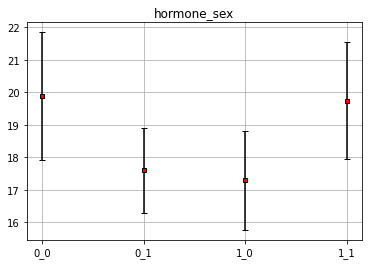

In [10]:
# ДИ
#выставляем уровень значимости
p = 0.95

data_agg = data2.groupby(['hormone','sex']).agg(['count','mean','std'])
#для каждой выборки высчитываем интервал по формуле для t-распределения: (K * se), где 
#K t-value, зависит от степеней свободы df = n-1 и целевого значения вероятности p, 
#se - стандартная ошибка среднего = std/sqrt(n), std - стандартное отклонение выборки, n - количество элементов 
data_agg['interval'] = stats.t.ppf((1 + p)/2, data_agg['var4']['count']-1)*data_agg['var4']['std']/(data_agg['var4']['count'] ** 0.5)

#cтроим доверительные интервалы на графике
plt.errorbar(x=[str(i[0]) + '_' + str(i[1]) for i in data_agg.index], y=data_agg['var4']['mean'], yerr=data_agg['interval'], color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')
plt.title('hormone_sex')
plt.grid()
#plt.xlabel('therapy')
#plt.ylabel('Уровень экспрессии')
plt.show()